# Daily Challenge - Statistics for Machine Learning

# Applying Inferential Statistics

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

#matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

from scipy.stats import ttest_ind
import numpy as np

In [11]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [12]:
## TODO : load the csv file from this link : https://www.kaggle.com/code/vaibhagarwal/inferential-statistics/input
file_1 = 'Churn_Modelling.csv'

In [13]:
## TODO : make into a dataframe called df
df = pd.read_csv(file_1)

In [14]:
## TODO : output the first 5 lines
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [15]:
## TODO : Create two separate DataFrames, `df_0` and `df_1`, to filter customers who have not exited (0) and customers who have exited (1), respectively
df_0 = df[df['Exited'] == 0]  # customers who have NOT exited
df_1 = df[df['Exited'] == 1]  # customers who HAVE exited

print(f"Number of customers who stayed: {len(df_0)}")
print(f"Number of customers who exited: {len(df_1)}")

Number of customers who stayed: 7963
Number of customers who exited: 2037


## Hypothesis 1: Age

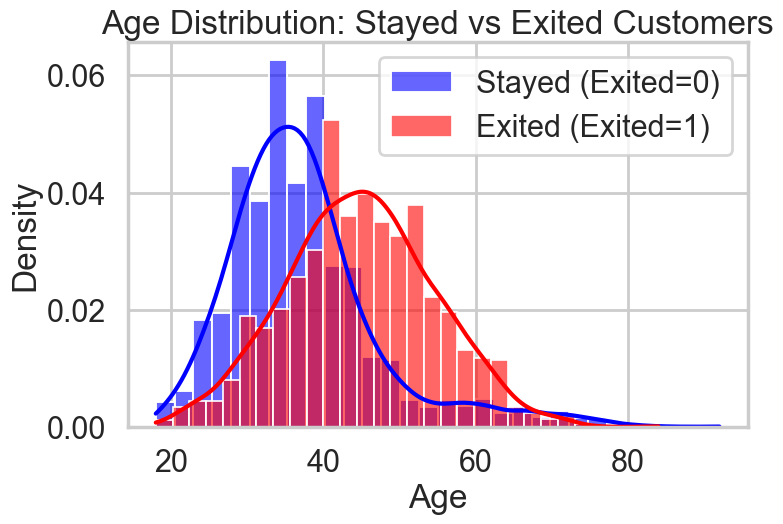

In [16]:
## TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn, with different colors for each group and a legend.

# Histogram for customers who stayed
sns.histplot(df_0['Age'], bins=30, color='blue', label='Stayed (Exited=0)', kde=True, stat="density", alpha=0.6)

# Histogram for customers who exited
sns.histplot(df_1['Age'], bins=30, color='red', label='Exited (Exited=1)', kde=True, stat="density", alpha=0.6)

plt.title('Age Distribution: Stayed vs Exited Customers')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [17]:
## TODO: Calculate the mean and standard deviation of the age for customers who stayed with the bank.
print("Mean value for customers who stayed in the bank: ", df_0['Age'].mean())
print("Standard deviation value for customers who stayed in the bank: ", df_0['Age'].std())

Mean value for customers who stayed in the bank:  37.40838879819164
Standard deviation value for customers who stayed in the bank:  10.125362911047539


In [18]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.
print("Mean value for customers who left the bank: ", df_1['Age'].mean())
print("Standard deviation value for customers who left the bank: ", df_1['Age'].std())

Mean value for customers who left the bank:  44.8379970544919
Standard deviation value for customers who left the bank:  9.76156155550719


In [19]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.
t_stat, p_value = ttest_ind(df_0['Age'], df_1['Age'], equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant difference in age between groups (reject H0)")
else:
    print("Result: No significant difference in age between groups (fail to reject H0)")

T-statistic: -30.4192
P-value: 0.0000
Result: Significant difference in age between groups (reject H0)


### Using Bootstrapping

In [20]:
## TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.
def bs_choice(data, func, size):
    bs_s = np.empty(size)  # pre-allocate array for bootstrap statistics
    n = len(data)
    
    for i in range(size):
        bs_abc = np.random.choice(data, size=n, replace=True)  # bootstrap sample
        bs_s[i] = func(bs_abc)  # compute statistic on bootstrap sample
    
    return bs_s

In [21]:
## TODO: Calculate the difference in means and shift the ages to the overall mean.
mean_0 = df_0['Age'].mean()
mean_1 = df_1['Age'].mean()
overall_mean = df['Age'].mean()

diff_means = mean_1 - mean_0

print(f"Mean age stayed: {mean_0:.2f}")
print(f"Mean age exited: {mean_1:.2f}")
print(f"Difference in means (Exited - Stayed): {diff_means:.2f}")
print(f"Overall mean age: {overall_mean:.2f}")

Mean age stayed: 37.41
Mean age exited: 44.84
Difference in means (Exited - Stayed): 7.43
Overall mean age: 38.92


In [27]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.
# Bootstrap standard deviations for each group
bs_std_0 = bs_choice(df_0['Age'], np.std, 1000)
bs_std_1 = bs_choice(df_1['Age'], np.std, 1000)

print(f"Bootstrap std dev (Stayed): {np.mean(bs_std_0):.2f}")
print(f"Bootstrap std dev (Exited): {np.mean(bs_std_1):.2f}")

# Bootstrap distribution of difference in means
def diff_means(data1, data2):
    return np.mean(data2) - np.mean(data1)

n_bootstrap = 100
bs_diff_means = np.empty(n_bootstrap)

for i in range(n_bootstrap):
    sample_0 = bs_choice(data=df_0['Age'], size= n_bootstrap, func=np.mean)
    sample_1 = bs_choice(data=df_1['Age'], size= n_bootstrap, func=np.mean)
    bs_diff_means[i] = diff_means(sample_0, sample_1)


Bootstrap std dev (Stayed): 10.12
Bootstrap std dev (Exited): 9.75


In [28]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.
observed_diff = mean_1 - mean_0  # from your earlier calculation

# Two-sided p-value: proportion of bootstrap diffs as or more extreme than observed
p_value = np.mean(np.abs(bs_diff_means) >= np.abs(observed_diff))

print(f"P-value from bootstrap: {p_value:.4f}")


P-value from bootstrap: 0.6000


### Conclusion
Do we reject the Null Hypothesis ? Why ?
p-value is >= 0.05. We fail to reject H0.


## Hypothesis 2: Credit Score

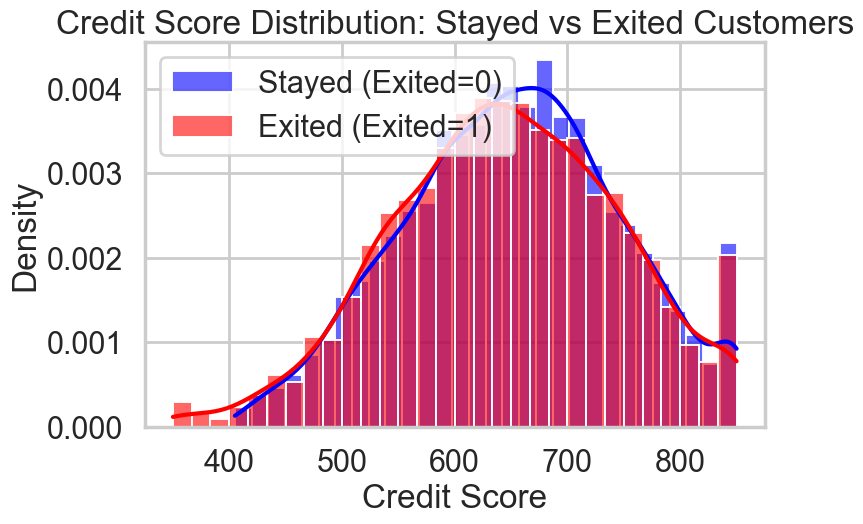

In [29]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).
# Histogram for customers who stayed
sns.histplot(df_0['CreditScore'], bins=30, color='blue', label='Stayed (Exited=0)', kde=True, stat="density", alpha=0.6)

# Histogram for customers who exited
sns.histplot(df_1['CreditScore'], bins=30, color='red', label='Exited (Exited=1)', kde=True, stat="density", alpha=0.6)

plt.title('Credit Score Distribution: Stayed vs Exited Customers')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In [30]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).
t_stat, p_value = ttest_ind(df_0['CreditScore'], df_1['CreditScore'], equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant difference in Credit Score between groups (reject H0)")
else:
    print("Result: No significant difference in Credit Score between groups (fail to reject H0)")

T-statistic: 2.6347
P-value: 0.0085
Result: Significant difference in Credit Score between groups (reject H0)


### Conclusion
Do we reject the Null Hypothesis ? Why ?

## Hypothesis 3: Balance

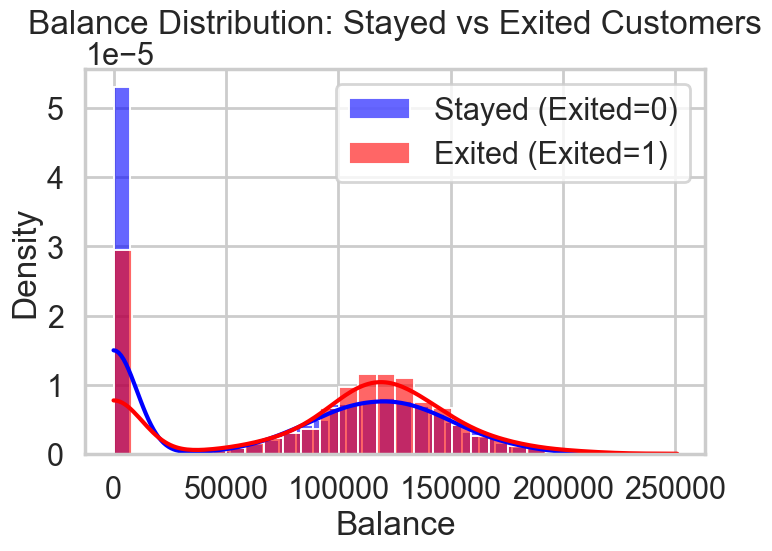

In [31]:
## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).
# Histogram for customers who stayed
sns.histplot(df_0['Balance'], bins=30, color='blue', label='Stayed (Exited=0)', kde=True, stat="density", alpha=0.6)

# Histogram for customers who exited
sns.histplot(df_1['Balance'], bins=30, color='red', label='Exited (Exited=1)', kde=True, stat="density", alpha=0.6)

plt.title('Balance Distribution: Stayed vs Exited Customers')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.show()

In [32]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.
t_stat, p_value = ttest_ind(df_0['Balance'], df_1['Balance'], equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant difference in Balance between groups (reject H0)")
else:
    print("Result: No significant difference in Balance between groups (fail to reject H0)")

T-statistic: -12.4713
P-value: 0.0000
Result: Significant difference in Balance between groups (reject H0)


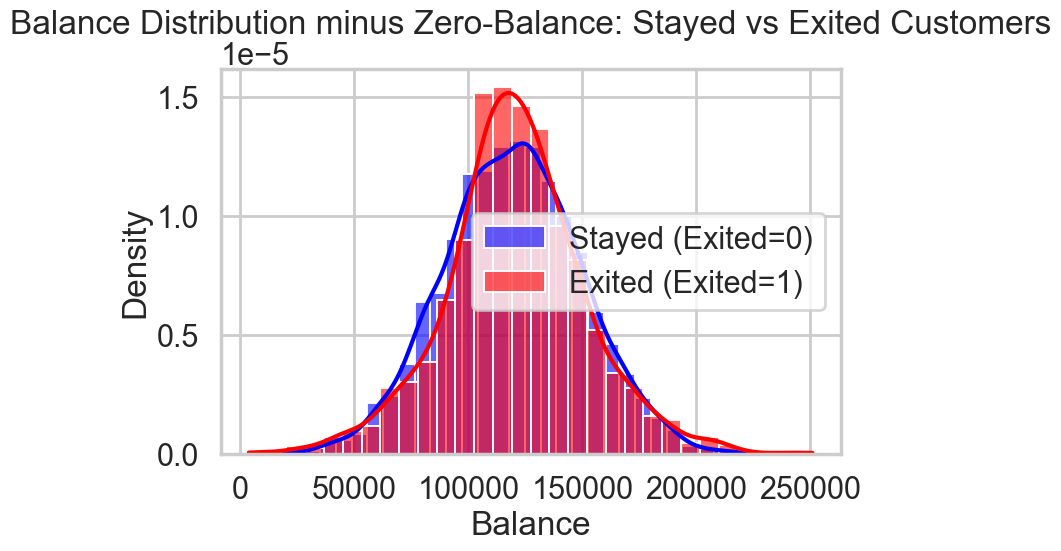

In [33]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.
# Histogram for customers who stayed
sns.histplot(df_0[df_0['Balance'] != 0]['Balance'], bins=30, color='blue', label='Stayed (Exited=0)', kde=True, stat="density", alpha=0.6)

# Histogram for customers who exited
sns.histplot(df_1[df_1['Balance'] != 0]['Balance'], bins=30, color='red', label='Exited (Exited=1)', kde=True, stat="density", alpha=0.6)

plt.title('Balance Distribution minus Zero-Balance: Stayed vs Exited Customers')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.show()

In [34]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.
t_stat, p_value = ttest_ind(df_0[df_0['Balance'] != 0]['Balance'], df_1[df_1['Balance'] != 0]['Balance'], equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant difference in Balance between groups (reject H0)")
else:
    print("Result: No significant difference in Balance between groups (fail to reject H0)")

T-statistic: -1.3605
P-value: 0.1738
Result: No significant difference in Balance between groups (fail to reject H0)


## Conclusion

Do we reject the Null Hypothesis ? Why ?
Considering Zero-balance is usually a transitory state we can view as an anomaly, I would say we "fail to reject H0".

## Hypothesis 4: Estimated Salary

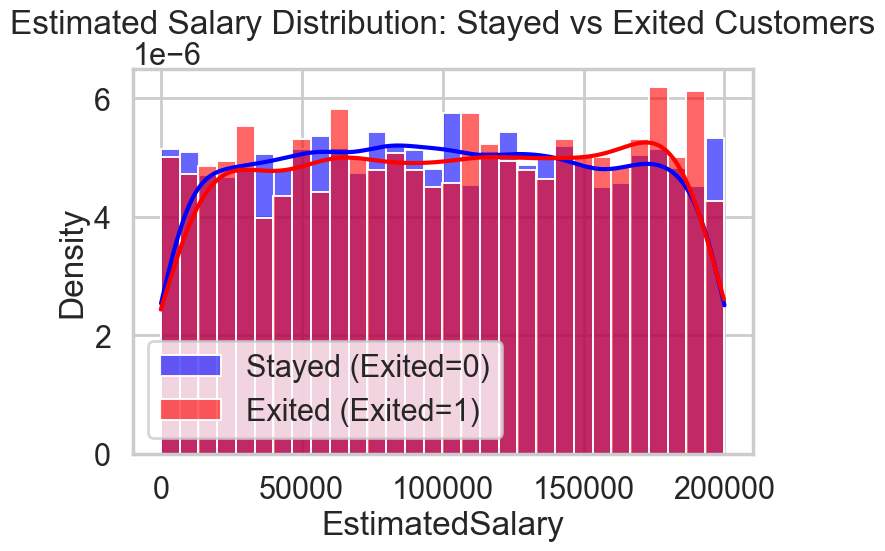

In [35]:
## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.
# Histogram for customers who stayed
sns.histplot(df_0['EstimatedSalary'], bins=30, color='blue', label='Stayed (Exited=0)', kde=True, stat="density", alpha=0.6)

# Histogram for customers who exited
sns.histplot(df_1['EstimatedSalary'], bins=30, color='red', label='Exited (Exited=1)', kde=True, stat="density", alpha=0.6)

plt.title('Estimated Salary Distribution: Stayed vs Exited Customers')
plt.xlabel('EstimatedSalary')
plt.ylabel('Density')
plt.legend()
plt.show()

In [36]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.
t_stat, p_value = ttest_ind(df_0['EstimatedSalary'], df_1['EstimatedSalary'], equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant difference in Estimated Salary between groups (reject H0)")
else:
    print("Result: No significant difference in Estimated Salary between groups (fail to reject H0)")

T-statistic: -1.2034
P-value: 0.2289
Result: No significant difference in Estimated Salary between groups (fail to reject H0)


### Using Bootstrapping

In [37]:
## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.
mean_0 = df_0['EstimatedSalary'].mean()
mean_1 = df_1['EstimatedSalary'].mean()
overall_mean = df['EstimatedSalary'].mean()

diff_means = mean_1 - mean_0

print(f"Mean Estimated Salary stayed: {mean_0:.2f}")
print(f"Mean Estimated Salary exited: {mean_1:.2f}")
print(f"Difference in means (Exited - Stayed): {diff_means:.2f}")
print(f"Overall mean Estimated Salary: {overall_mean:.2f}")

Mean Estimated Salary stayed: 99738.39
Mean Estimated Salary exited: 101465.68
Difference in means (Exited - Stayed): 1727.29
Overall mean Estimated Salary: 100090.24


In [43]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.
def diff_means(data1, data2):
    return np.mean(data2) - np.mean(data1)

n_bootstrap = 100
bs_diff_means = np.empty(n_bootstrap)

for i in range(n_bootstrap):
    sample_0 = bs_choice(data=df_0['EstimatedSalary'], size= n_bootstrap, func=np.mean)
    sample_1 = bs_choice(data=df_1['EstimatedSalary'], size= n_bootstrap, func=np.mean)
    bs_diff_means[i] = diff_means(sample_0, sample_1)

In [44]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.
observed_diff = mean_1 - mean_0  # from your earlier calculation

# Two-sided p-value: proportion of bootstrap diffs as or more extreme than observed
p_value = np.mean(np.abs(bs_diff_means) >= np.abs(observed_diff))

print(f"P-value from bootstrap: {p_value:.4f}")

P-value from bootstrap: 0.5400


### Conclusion
Do we reject the Null Hypothesis ? Why ?
We fail to reject H0.

## Final Conclusion
What will be the most helpful feature in predicting churning?
CreditScore is your most helpful feature (among those tested) because it shows the strongest statistical difference between groups.